## Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
sns.set()
plt.style.use('ggplot')

## Bike Sharing Project, read file, import relevant libraries, features

In [2]:
df = pd.read_csv("data/train.csv", parse_dates=["datetime"])

In [3]:
#pd.to_datetime("3.2.2020", format='%d.%m.%Y')

In [4]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
df.shape[0]

10886

In [6]:
add_c= df.copy()

# add a  column for day of the week, hour of the day, months df['month'] = df['datetime'].dt.month_name()
add_c['month'] = df['datetime'].dt.month_name()
add_c['hour'] = df['datetime'].dt.hour
add_c['weekday'] = df['datetime'].dt.day_name()


In [7]:
add_c.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,January,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,January,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,January,4,Saturday


## Data Exploration

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

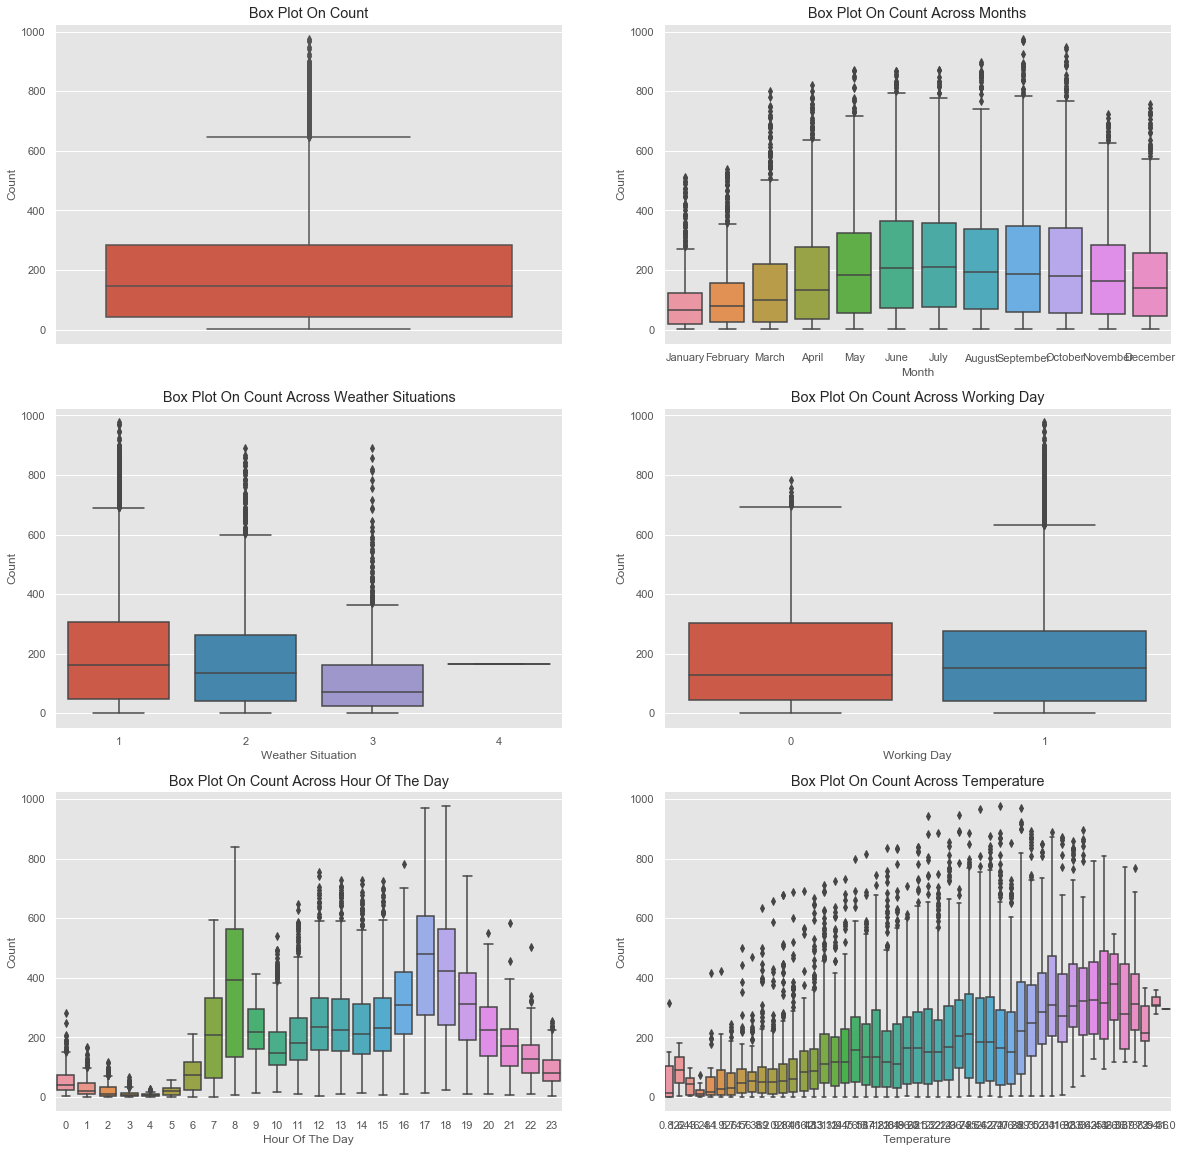

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=add_c,y="count",ax=axes[0][0])
sns.boxplot(data=add_c,y="count",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=add_c,y="count",x="weather",orient="v",ax=axes[1][0])
sns.boxplot(data=add_c,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=add_c,y="count",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=add_c,y="count",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

## Clean data, e.g. Remove outliers from the dataset

In [9]:
dfObj = pd.DataFrame(add_c)
#indexNames = dfObj[ dfObj['count'] >= 650 ].index
indexNames = dfObj[(dfObj['count'] >= 630)|((dfObj['count'] >= 600) & (dfObj["weather"]==2))|((dfObj['count'] >= 310) & (dfObj["weather"]==3)|(dfObj["weather"]==4))].index
dfObj.drop(indexNames , inplace=True)

#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index                     
                     
dfObj.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,January,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,January,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,January,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,January,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,January,4,Saturday
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,January,5,Saturday
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,January,6,Saturday
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,January,7,Saturday
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,January,8,Saturday
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,January,9,Saturday


In [10]:
dfObj.shape[0]

10458

In [11]:
bsd = dfObj[["datetime", "season", "holiday", "workingday", "weather", "temp","atemp", "humidity", "count", "hour", "month", "weekday", "windspeed"]]

In [12]:
bsd.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,count,hour,month,weekday,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,16,0,January,Saturday,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,40,1,January,Saturday,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,32,2,January,Saturday,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,13,3,January,Saturday,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,1,4,January,Saturday,0.0


## Data Exploration

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

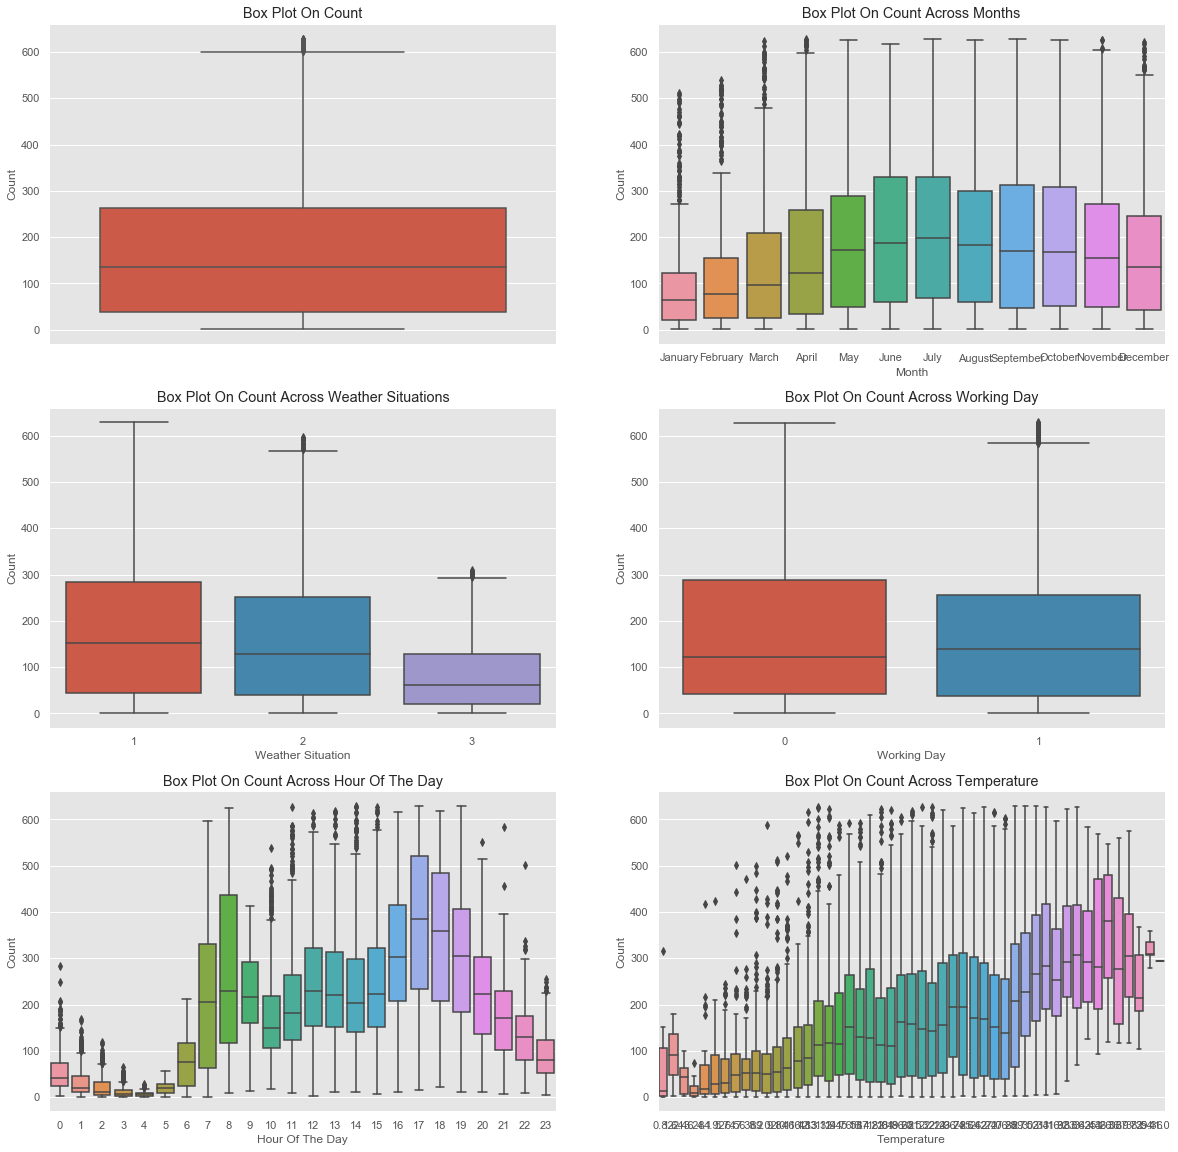

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
sns.boxplot(data=bsd,y="count",ax=axes[0][0])
sns.boxplot(data=bsd,y="count",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=bsd,y="count",x="weather",orient="v",ax=axes[1][0])
sns.boxplot(data=bsd,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=bsd,y="count",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=bsd,y="count",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

In [14]:
bsd.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,count,hour,windspeed
season,1.000000,0.030652,-0.012740,0.005378,0.264478,0.271039,0.195279,0.165529,-0.008495,-0.151141
holiday,0.030652,1.000000,-0.251384,-0.007769,0.003969,-0.001597,0.001429,0.011175,0.001183,0.007851
workingday,-0.012740,-0.251384,1.000000,0.033869,0.026932,0.022158,-0.014912,-0.027278,-0.001931,0.014999
weather,0.005378,-0.007769,0.033869,1.000000,-0.059171,-0.059991,0.407934,-0.160586,-0.028028,0.001444
temp,0.264478,0.003969,0.026932,-0.059171,1.000000,0.985809,-0.050406,0.386088,0.129976,-0.023632
atemp,0.271039,-0.001597,0.022158,-0.059991,0.985809,1.000000,-0.029495,0.382737,0.125339,-0.064818
humidity,0.195279,0.001429,-0.014912,0.407934,-0.050406,-0.029495,1.000000,-0.331248,-0.271985,-0.321827
count,0.165529,0.011175,-0.027278,-0.160586,0.386088,0.382737,-0.331248,1.000000,0.429265,0.108431
hour,-0.008495,0.001183,-0.001931,-0.028028,0.129976,0.125339,-0.271985,0.429265,1.000000,0.144004
windspeed,-0.151141,0.007851,0.014999,0.001444,-0.023632,-0.064818,-0.321827,0.108431,0.144004,1.000000


In [15]:
bsd.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,count,hour,windspeed
count,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000,10458.000000
mean,2.495697,0.029356,0.676324,1.412316,20.004534,23.414807,62.167718,171.573245,11.415089,12.749583
std,1.124050,0.168809,0.467900,0.625713,7.782727,8.470275,19.233037,152.081908,6.978848,8.152395
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,39.000000,5.000000,7.001500
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,136.000000,11.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,264.000000,17.000000,16.997900
max,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,629.000000,23.000000,56.996900


## Define and select dependent and independent variables

In [16]:
X = bsd[["temp", "humidity", "workingday", "holiday", "hour", "weather", "month", "weekday"]]
y = bsd["count"]

In [17]:
bsd.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,count,hour,month,weekday,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,16,0,January,Saturday,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,40,1,January,Saturday,0.0


## Split data into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.head(2)

,temp,humidity,workingday,holiday,hour,weather,month,weekday
8466,28.70,54,0,0,3,2,July,Saturday
7062,19.68,31,1,0,15,1,April,Thursday


## Tranform columns and imply binning

In [20]:
column_trans = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), ['weather', 'month', "weekday","hour" ]),
    (KBinsDiscretizer(n_bins=8, encode='onehot-dense'), ['temp', "humidity"]),
    remainder="passthrough"
)

# column-trans2 needed for RandomForestRegression which doesnt need bin variables

column_trans2 = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), ['weather', 'month', "weekday","hour" ]),
    remainder="passthrough"
)

In [21]:
column_trans.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [22]:
column_trans2.fit_transform(X)

array([[ 0.,  0.,  0., ..., 81.,  0.,  0.],
       [ 0.,  0.,  0., ..., 80.,  0.,  0.],
       [ 0.,  0.,  0., ..., 80.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 61.,  1.,  0.],
       [ 0.,  0.,  0., ..., 61.,  1.,  0.],
       [ 0.,  0.,  0., ..., 66.,  1.,  0.]])

## Define Model (Ridge Regression, run pipe and find best parameter for alpha)

In [23]:

rr = Ridge(alpha=1.0)


pipe = make_pipeline(column_trans,PolynomialFeatures(degree=2),rr)

In [24]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'polynomialfeatures', 'ridge', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__kbinsdiscretizer', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__kbinsdiscretizer__encode', 'columntransformer__kbinsdiscretizer__n_bins', 'columntransformer__kbinsdiscretizer__strategy', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state',

In [25]:
grid = {
     "ridge__alpha":[0.2, 0.3, 0.4],
     'polynomialfeatures__degree':[2]
}
cv_grid = GridSearchCV(
    pipe, 
    grid, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, return_train_score=True)
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
           

In [26]:
pd.DataFrame(cv_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.326211,0.515814,0.381511,0.141727,2,0.2,"{'polynomialfeatures__degree': 2, 'ridge__alph...",-4012.193368,-4192.729991,-3798.436046,...,-4030.903334,142.266400,3,-2651.219888,-2608.176234,-2689.268154,-2623.410033,-2658.384317,-2646.091725,28.261824
1,10.582629,1.456868,0.529860,0.045965,2,0.3,"{'polynomialfeatures__degree': 2, 'ridge__alph...",-3994.869093,-4178.343938,-3788.104072,...,-4018.144262,140.241253,2,-2654.989688,-2611.542460,-2692.573970,-2626.631645,-2661.495762,-2649.446705,28.259951
2,10.438278,1.722303,0.339648,0.070994,2,0.4,"{'polynomialfeatures__degree': 2, 'ridge__alph...",-3981.487031,-4166.310372,-3779.655007,...,-4007.680148,138.407150,1,-2659.100937,-2615.296731,-2696.154151,-2630.266286,-2664.931366,-2653.149894,28.213846


In [27]:
cv_grid.best_estimator_.predict(X_test)

array([ 86.14061502, 480.14235657,  81.69204961, ..., 190.41009898,
       314.66910102, -22.19510843])

In [28]:
cv_grid.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['weather', 'month',
                                                   'weekday', 'hour']),
                                                 ('kbinsdiscretizer',
                                              

In [29]:
#pipe.fit(X_train, y_train) 

## Predict data for y

In [30]:
y_pred = cv_grid.best_estimator_.predict(X_test)
y_pred

array([ 86.14061502, 480.14235657,  81.69204961, ..., 190.41009898,
       314.66910102, -22.19510843])

In [31]:
y_pred.shape

(2092,)

In [32]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [33]:
df1.head(5)

,Actual,Predicted
3676,60,86.140615
8862,562,480.142357
2889,71,81.692050
7052,21,21.213713
2199,122,196.391644


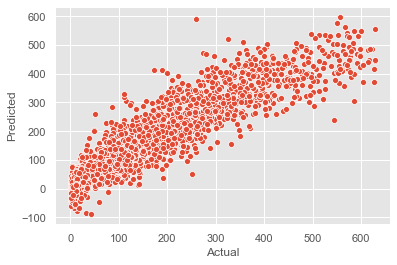

In [34]:
ax = sns.scatterplot(x="Actual", y="Predicted",
                     data=df1)

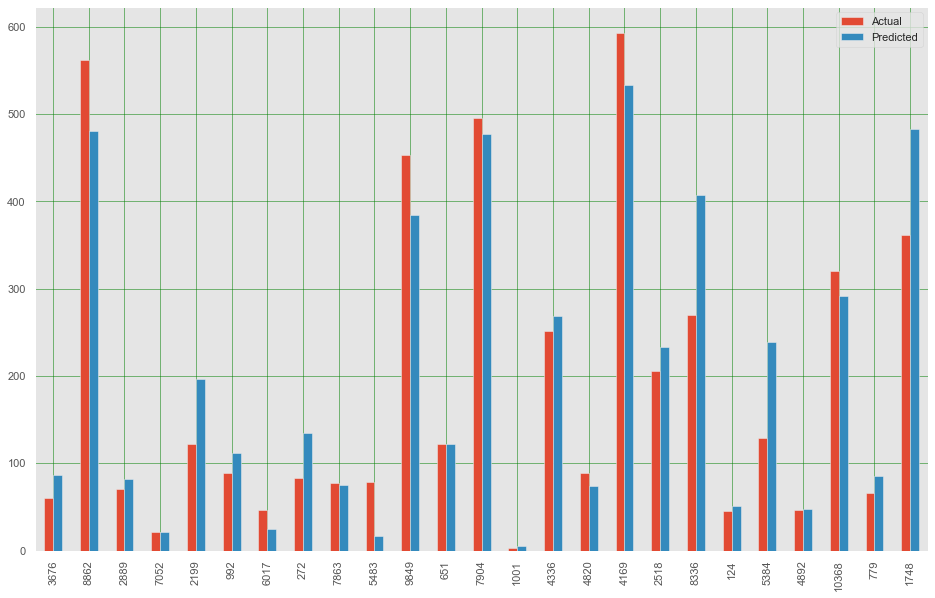

In [35]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Calculate MAR, MSE and RMSE

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.05531536529343
Mean Squared Error: 3817.146562930313
Root Mean Squared Error: 61.7830604853006


## Calculate R2

In [37]:
r2_score(y_test, y_pred)


0.8356408606007838

## Print out the intercept

In [38]:
#print(rr.intercept_)

## Try and Imply new model (RandomForestRegressor)

In [39]:
rfr = RandomForestRegressor()

In [40]:
pipe2 = make_pipeline(column_trans2,rfr)

In [41]:
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split',

In [42]:
grid2 = {
     'randomforestregressor__max_depth':[140, 150],
}

cv_grid2 = GridSearchCV(
    pipe2, 
    grid2, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, return_train_score=True)

cv_grid2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
           

In [43]:
cv_grid2.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['weather', 'month',
                                                   'weekday', 'hour'])],
                                   verbose=False)),
                ('ra...
                 RandomForestRegressor(

In [44]:
cv_grid2.best_estimator_.predict(X_test)

array([ 81.93, 516.21,  52.06, ..., 219.08, 304.  ,   8.42])

In [45]:
#pipe2.fit(X_train, y_train) 

In [46]:
y_pred2 = cv_grid2.predict(X_test)

In [47]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df3.head(5)

,Actual,Predicted
3676,60,81.930
8862,562,516.210
2889,71,52.060
7052,21,26.910
2199,122,157.755


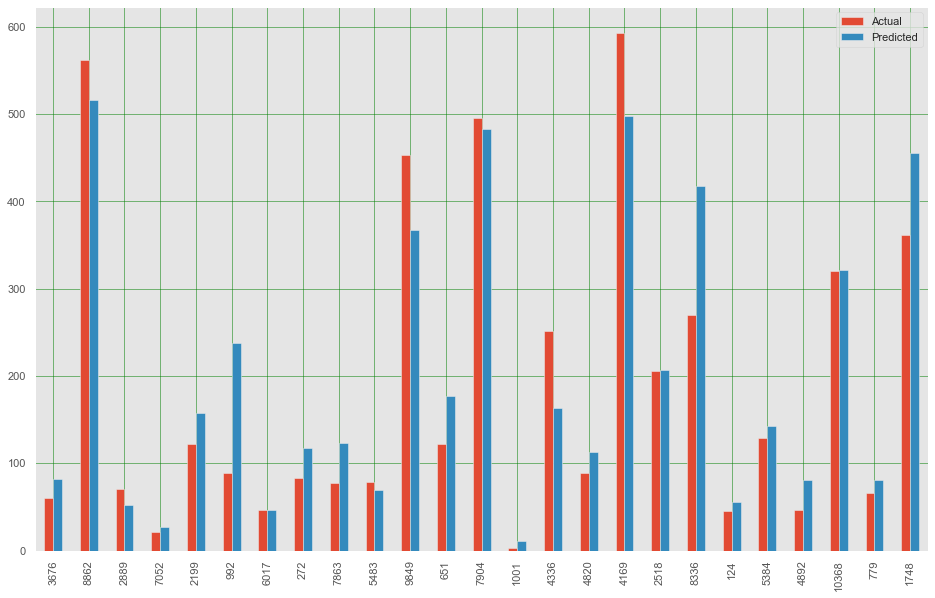

In [48]:
df4 = df3.head(25)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 44.352166177273965
Mean Squared Error: 4169.077089733779
Root Mean Squared Error: 64.56839079405479
